\begin{align*}
4.2x_1 + 10x_2 &= 136, \\
-10.1x_1 + 13.8x_2 &= 132, \\
18.3x_1 - 7.6x_2 &= 108.
\end{align*}

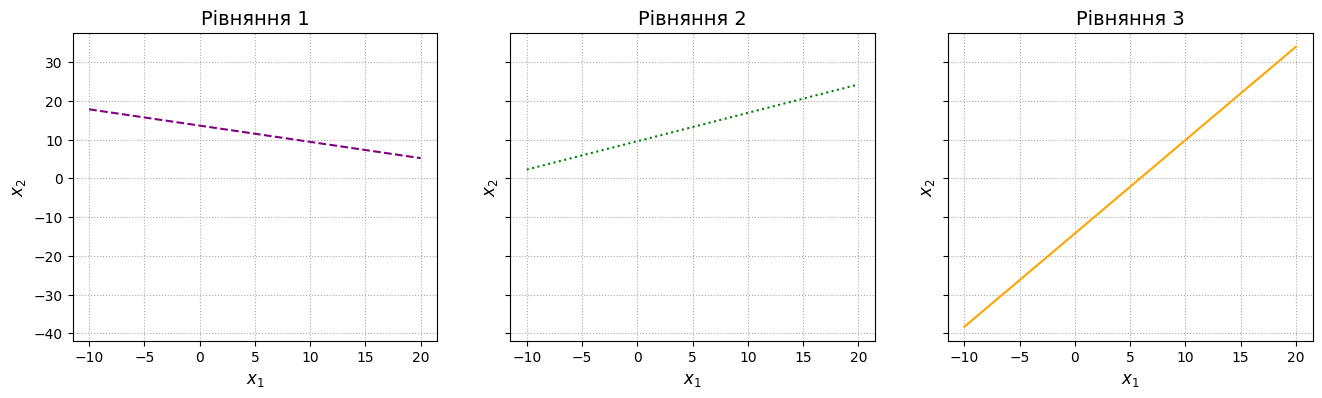

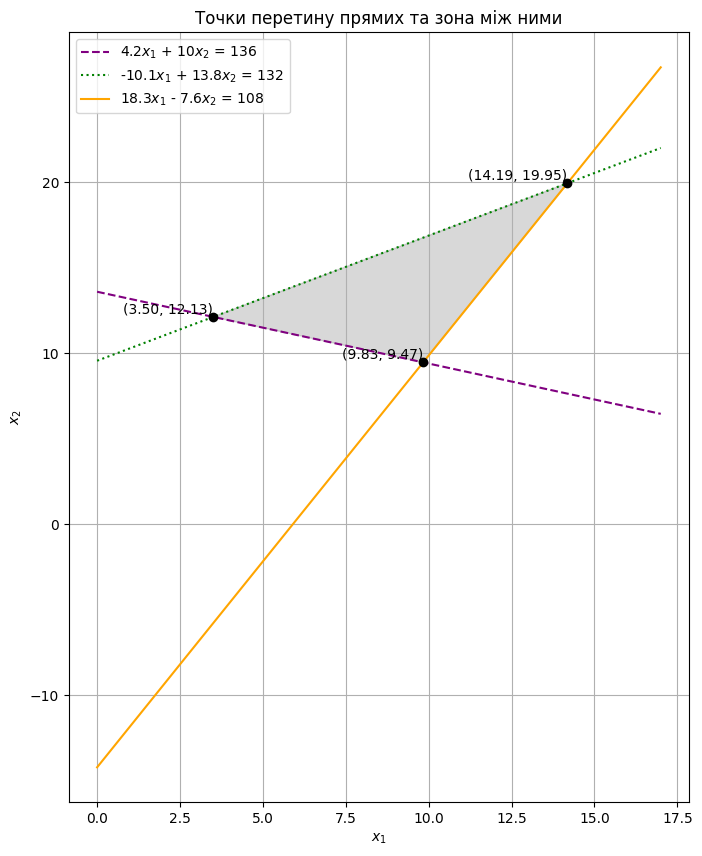

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Система рівнянь
eqs = np.array([
    [4.2, 10, 136],
    [-10.1, 13.8, 132],
    [18.3, -7.6, 108],
])

# Кольори та типи ліній
colors = ['purple', 'green', 'orange']
linestyles = ['--', 'dotted', 'solid']

# Побудова окремих графіків
fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
for i, ax in enumerate(axes):
    x = np.linspace(-10, 20, 400)
    y = (eqs[i][2] - eqs[i][0] * x) / eqs[i][1]
    ax.plot(x, y, color=colors[i], linestyle=linestyles[i])
    ax.set_xlabel("$x_1$", fontsize=12)
    ax.set_ylabel("$x_2$", fontsize=12)
    ax.set_title(f"Рівняння {i+1}", fontsize=14)
    ax.grid(color="#aaaaaa", linestyle=":")

# Побудова графіків прямих
x = np.linspace(0, 17, 100)
fig, ax = plt.subplots(figsize=(8, 10))

for eq, color, linestyle in zip(eqs, ['purple', 'green', 'orange'], ['--', 'dotted', 'solid']):
    y = (eq[2] - eq[0] * x) / eq[1]
    ax.plot(x, y, color=color, linestyle=linestyle)

# Знаходження та позначення точок перетину
intersections = []
for i in range(len(eqs)):
    for j in range(i + 1, len(eqs)):
        A = np.array([eqs[i][:2], eqs[j][:2]])
        b = np.array([eqs[i][2], eqs[j][2]])
        intersection = np.linalg.solve(A, b)
        intersections.append(intersection)

# Відображення точок перетину та вказівок на графіку
for intersection in intersections:
    ax.plot(intersection[0], intersection[1], 'ko')  # Відмітити точку
    ax.text(intersection[0], intersection[1], f'({intersection[0]:.2f}, {intersection[1]:.2f})', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Знаходимо координати вершин трикутника
x_coords = [point[0] for point in intersections]
y_coords = [point[1] for point in intersections]

# Зафарбовуємо зону між прямими трикутником
ax.fill(x_coords, y_coords, color='gray', alpha=0.3)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Точки перетину прямих та зона між ними')

plt.legend(['4.2$x_1$ + 10$x_2$ = 136', '-10.1$x_1$ + 13.8$x_2$ = 132', '18.3$x_1$ - 7.6$x_2$ = 108'])

plt.grid(True)
plt.show()
